In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import random
import keras
import os
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

from tensorflow.keras.datasets import cifar10

physical_devices = tf.config.list_physical_devices("GPU")
tf.config.experimental.set_memory_growth(physical_devices[0], True)

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True


In [2]:
dfTrain = pd.read_csv('./Train_copia.csv')
dfValidation = pd.read_csv('./Validation.csv')
dfTest = pd.read_csv('./Test.csv')

In [3]:
dfTrain

,SensorTime,CaptureTime,Filename,Agency,SiteNumber,TimeZone,Stage,Discharge,CalcTimestamp,width,...,WeirPt2X,WeirPt2Y,WwRawLineMin,WwRawLineMax,WwRawLineMean,WwRawLineSigma,WwCurveLineMin,WwCurveLineMax,WwCurveLineMean,WwCurveLineSigma
0,09/06/2012 13:15,2012-06-09T13:09:07,./images2/StateLineWeir_20120609_Farrell_001.jpg,USGS,6674500,MDT,2.99,916.0,2020-03-11T16:58:28,4288,...,-1,-1,0,0,0.00000,0.00000,0,0,0.00000,0.00000
1,09/06/2012 13:15,2012-06-09T13:10:29,./images2/StateLineWeir_20120609_Farrell_002.jpg,USGS,6674500,MDT,2.99,916.0,2020-03-11T16:58:33,4288,...,-1,-1,0,0,0.00000,0.00000,0,0,0.00000,0.00000
2,09/06/2012 13:45,2012-06-09T13:44:01,./images2/StateLineWeir_20120609_Farrell_003.jpg,USGS,6674500,MDT,2.96,873.0,2020-03-11T16:58:40,4288,...,-1,-1,0,0,0.00000,0.00000,0,0,0.00000,0.00000
3,09/06/2012 14:45,2012-06-09T14:44:30,./images2/StateLineWeir_20120609_Farrell_004.jpg,USGS,6674500,MDT,2.94,846.0,2020-03-11T16:58:47,4288,...,-1,-1,0,0,0.00000,0.00000,0,0,0.00000,0.00000
4,09/06/2012 15:45,2012-06-09T15:44:59,./images2/StateLineWeir_20120609_Farrell_005.jpg,USGS,6674500,MDT,2.94,846.0,2020-03-11T16:58:55,4288,...,-1,-1,0,0,0.00000,0.00000,0,0,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,27/10/2015 11:00,2015-10-27T11:00:30,./images2/StateLineWeir_20151027_Farrell_138.JPG,USGS,6674500,MDT,2.40,322.0,2020-03-11T16:27:40,4288,...,2186,1900,7751,85919,42249.76797,19871.28279,0,77000,41574.38204,20332.52069
14995,27/10/2015 12:00,2015-10-27T12:00:31,./images2/StateLineWeir_20151027_Farrell_139.JPG,USGS,6674500,MDT,2.39,315.0,2020-03-11T16:27:42,4288,...,2197,1900,0,81792,39043.91375,19323.98869,0,76047,38548.37317,19516.57002
14996,27/10/2015 13:00,2015-10-27T13:00:31,./images2/StateLineWeir_20151027_Farrell_140.JPG,USGS,6674500,MDT,2.40,322.0,2020-03-11T16:27:43,4288,...,2179,1900,8951,90933,46499.77796,21242.76532,0,85005,45722.75204,21880.23267
14997,27/10/2015 14:00,2015-10-27T14:00:31,./images2/StateLineWeir_20151027_Farrell_141.JPG,USGS,6674500,MDT,2.39,315.0,2020-03-11T16:27:45,4288,...,2174,1900,9961,88893,43632.52898,19680.33833,0,80080,42863.85481,20255.00800


In [4]:
dfTest

,SensorTime,CaptureTime,Filename,Agency,SiteNumber,TimeZone,Stage,Discharge,CalcTimestamp,width,...,WeirPt2X,WeirPt2Y,WwRawLineMin,WwRawLineMax,WwRawLineMean,WwRawLineSigma,WwCurveLineMin,WwCurveLineMax,WwCurveLineMean,WwCurveLineSigma
0,01/07/2017 07:00,2017-07-01T07:00:13,./images2/StateLineWeir_20170701_Farrell_339.jpg,USGS,6674500,MDT,3.34,1310.0,2020-03-12T07:46:16,4288,...,2216,1900,0,118951,24031.15397,32991.69730,0,111079,23016.60817,32400.65323
1,01/07/2017 08:00,2017-07-01T08:00:13,./images2/StateLineWeir_20170701_Farrell_340.jpg,USGS,6674500,MDT,3.35,1330.0,2020-03-12T07:46:17,4288,...,2152,1900,0,108730,47314.66911,32632.78173,0,102392,46500.21987,32776.58187
2,01/07/2017 09:00,2017-07-01T09:00:13,./images2/StateLineWeir_20170701_Farrell_341.jpg,USGS,6674500,MDT,3.35,1330.0,2020-03-12T07:46:18,4288,...,2168,1900,189,108271,47657.05921,22610.76375,0,97734,46962.22690,22684.08557
3,01/07/2017 10:00,2017-07-01T10:00:13,./images2/StateLineWeir_20170701_Farrell_342.jpg,USGS,6674500,MDT,3.35,1330.0,2020-03-12T07:46:20,4288,...,2161,1900,602,93923,49484.22384,21776.86379,0,89973,48809.44490,21698.00197
4,01/07/2017 11:00,2017-07-01T11:00:13,./images2/StateLineWeir_20170701_Farrell_343.jpg,USGS,6674500,MDT,3.35,1330.0,2020-03-12T07:46:21,4288,...,2139,1900,0,110407,48964.80114,23435.20866,0,103658,48311.45114,23283.27182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8409,06/08/2018 17:15,2018-08-06T17:14:26,./images2/StateLineWeir_20180806_Farrell_963.jpg,USGS,6674500,MDT,3.27,1270.0,2020-03-12T11:42:55,4288,...,2128,1900,2787,76986,37702.65298,17621.87416,0,70569,36880.54063,17697.64381
8410,06/08/2018 17:30,2018-08-06T17:29:27,./images2/StateLineWeir_20180806_Farrell_964.jpg,USGS,6674500,MDT,3.27,1270.0,2020-03-12T11:42:56,4288,...,2105,1900,614,77278,35588.55997,17940.82140,0,67295,35254.14818,17593.48889
8411,06/08/2018 17:45,2018-08-06T17:44:27,./images2/StateLineWeir_20180806_Farrell_965.jpg,USGS,6674500,MDT,3.27,1270.0,2020-03-12T11:42:57,4288,...,2123,1900,0,69390,28022.25424,19240.97913,0,66111,27651.99032,18904.67830
8412,06/08/2018 18:00,2018-08-06T17:59:27,./images2/StateLineWeir_20180806_Farrell_966.jpg,USGS,6674500,MDT,3.27,1270.0,2020-03-12T11:46:16,4288,...,2111,1900,2868,66550,32742.68957,15239.70813,0,58260,32133.49838,15284.01612


In [5]:
dfValidation

,SensorTime,CaptureTime,Filename,Agency,SiteNumber,TimeZone,Stage,Discharge,CalcTimestamp,width,...,WeirPt2X,WeirPt2Y,WwRawLineMin,WwRawLineMax,WwRawLineMean,WwRawLineSigma,WwCurveLineMin,WwCurveLineMax,WwCurveLineMean,WwCurveLineSigma
0,06/08/2018 18:30,2018-08-06T18:29:27,./images2/StateLineWeir_20180806_Farrell_968.jpg,USGS,6674500,MDT,3.27,1270.0,2020-03-12T11:42:38,4288,...,2118,1900,2647,68573,29938.21890,14338.75150,0,57396,29347.72155,14364.41965
1,06/08/2018 18:45,2018-08-06T18:44:27,./images2/StateLineWeir_20180806_Farrell_969.jpg,USGS,6674500,MDT,3.27,1270.0,2020-03-12T11:42:39,4288,...,2115,1900,1594,61068,29081.54089,13143.59083,0,53592,28529.97492,13182.20786
2,07/08/2018 05:00,2018-08-07T04:59:27,./images2/StateLineWeir_20180807_Farrell_971.jpg,USGS,6674500,MDT,3.26,1250.0,2020-03-12T11:42:40,4288,...,2124,1900,433,76769,35946.78884,19340.13195,0,73218,35227.00889,19543.47261
3,07/08/2018 06:15,2018-08-07T06:14:27,./images2/StateLineWeir_20180807_Farrell_976.jpg,USGS,6674500,MDT,3.26,1250.0,2020-03-12T11:42:42,4288,...,2108,1900,0,70237,31397.03249,18023.32419,0,63612,30729.80682,18171.12614
4,07/08/2018 06:30,2018-08-07T06:29:27,./images2/StateLineWeir_20180807_Farrell_977.jpg,USGS,6674500,MDT,3.26,1250.0,2020-03-12T11:42:43,4288,...,2138,1900,0,66076,32085.63358,18103.94446,0,60747,31372.90887,18170.61291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8406,11/10/2019 09:00,2019-10-11T08:59:53,./images2/StateLineWeir_20191011_Farrell_409.jpg,USGS,6674500,MDT,2.54,434.0,2020-03-12T16:23:53,4288,...,2446,1900,9284,77521,38385.37007,15952.02973,0,70085,37550.89482,16444.40121
8407,11/10/2019 10:00,2019-10-11T09:59:52,./images2/StateLineWeir_20191011_Farrell_410.jpg,USGS,6674500,MDT,2.54,434.0,2020-03-12T16:23:54,4288,...,2440,1900,10092,74614,40162.98929,15467.70886,0,70061,39397.33910,16009.00805
8408,11/10/2019 11:00,2019-10-11T10:59:52,./images2/StateLineWeir_20191011_Farrell_411.jpg,USGS,6674500,MDT,2.54,434.0,2020-03-12T16:23:55,4288,...,2447,1900,7067,83260,42095.94659,16770.35795,0,76335,41350.00657,17489.37462
8409,11/10/2019 12:00,2019-10-11T11:59:53,./images2/StateLineWeir_20191011_Farrell_412.jpg,USGS,6674500,MDT,2.54,434.0,2020-03-12T16:23:56,4288,...,2443,1900,6283,83045,45345.49095,17498.43285,0,78882,44553.92030,18268.29490


In [6]:
from keras.utils import to_categorical

model = Sequential([
            Conv2D(32, (3,3), activation='linear'),
            MaxPooling2D((2,2)),
            Conv2D(64, (3,3), activation='linear'),
            MaxPooling2D((2,2)),
            Conv2D(128, (3,3), activation='linear'),
            MaxPooling2D((2,2)),
            Flatten(),
            Dense(64, activation='linear'),
            Dense(32, activation='linear'),
            Dense(1, activation='linear')
]) 


In [7]:
model.compile(optimizer='adam', metrics=['mae'], loss="mean_squared_error",)

In [8]:
import math

def to_grayscale_then_rgb(image):
    image = tf.image.rgb_to_grayscale(image)
    image = tf.image.grayscale_to_rgb(image)
    return image

generator = ImageDataGenerator(
    rescale= 1. / 255,
    preprocessing_function=to_grayscale_then_rgb
)

train = generator.flow_from_dataframe(
    dataframe=dfTrain,
    x_col=' Filename',
    y_col=' Discharge',
    target_size=(512, 512),
    batch_size=8, 
    class_mode='raw',
    validate_filenames=True
)

test = generator.flow_from_dataframe(
    dataframe=dfTest,
    x_col=' Filename', 
    y_col=' Discharge',
    target_size=(512, 512),
    batch_size=8,
    class_mode='raw',
    validate_filenames=True
)

validation = generator.flow_from_dataframe(
    dataframe=dfValidation,
    x_col=' Filename',
    y_col=' Discharge',
    target_size=(512, 512), 
    batch_size=8, 
    class_mode='raw',
    validate_filenames=True
)

#def crop_generator(batches):
#    dx = 304
#    dy = 304
#    originSize = 512
#    while True:
#        batch_x, batch_y = next(batches)
#        ratio = batch_x.shape[1] / originSize

#        start_x= int(100 * ratio)
#        end_x = start_x + math.floor(dx * ratio)

#        start_y= int(145 * ratio)
#        end_y = start_y + math.floor(dy * ratio)
#        yield (batch_x[:, start_x:end_x, start_y:end_y, :], batch_y)

#train_cropped = crop_generator(train)
#test_cropped = crop_generator(test)
#validation_cropped = crop_generator(validation)

Found 14998 validated image filenames.


C:\Users\david\miniconda3\envs\tf_2.4\lib\site-packages\keras\preprocessing\image.py:1139: UserWarning: Found 1 invalid image filename(s) in x_col=" Filename". These filename(s) will be ignored.
  warnings.warn(


Found 8414 validated image filenames.
Found 8411 validated image filenames.


In [9]:
history = model.fit(train, epochs=5, validation_data=validation)

Epoch 1/5
1875/1875 [==============================] - 433s 230ms/step - loss: 1542751.8750 - mae: 778.3108 - val_loss: 1357082.8750 - val_mae: 793.8704
Epoch 2/5
1875/1875 [==============================] - 343s 183ms/step - loss: 1479139.6250 - mae: 742.6528 - val_loss: 1294844.5000 - val_mae: 757.2033
Epoch 3/5
1875/1875 [==============================] - 341s 182ms/step - loss: 1419166.6250 - mae: 707.8261 - val_loss: 1230462.2500 - val_mae: 717.0630
Epoch 4/5
1875/1875 [==============================] - 342s 182ms/step - loss: 1360705.6250 - mae: 675.6508 - val_loss: 1171124.2500 - val_mae: 679.0292
Epoch 5/5
1875/1875 [==============================] - 351s 187ms/step - loss: 1302049.7500 - mae: 652.4505 - val_loss: 1107578.5000 - val_mae: 654.3328


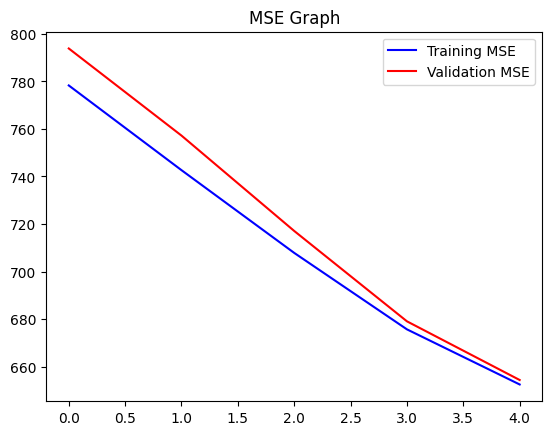

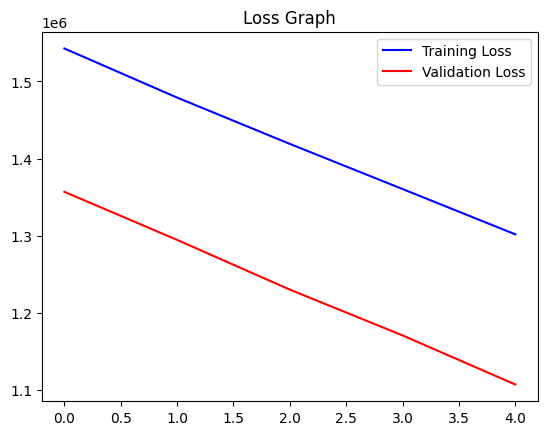

In [10]:
acc = history.history['mae']
val_acc = history.history['val_mae']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training MSE')
plt.plot(epochs, val_acc, 'r', label='Validation MSE')
plt.title('MSE Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

In [11]:
ypred1 = model.predict(test)

1052/1052 [==============================] - 139s 132ms/step


In [117]:
predictions = []
real_data = []
for i in range(4):
    index = random.randint(0, 1000)
    real_data.append(dfTest.iloc[index][7])
    predictions.append(ypred1[index])
print(real_data)
print(predictions)

[1620.0, 1370.0, 1620.0, 1600.0]
[array([223.385], dtype=float32), array([223.385], dtype=float32), array([223.385], dtype=float32), array([223.385], dtype=float32)]


In [13]:
model2 = Sequential([
            Conv2D(32, (3,3), activation='linear'),
            MaxPooling2D((2,2)),
            Conv2D(64, (3,3), activation='linear'),
            MaxPooling2D((2,2)),
            Conv2D(128, (3,3), activation='linear'),
            MaxPooling2D((2,2)),
            Flatten(),
            Dense(64, activation='linear'),
            Dense(32, activation='linear'),
            Dense(1, activation='linear')
]) 


In [14]:
model2.compile(optimizer='adam', metrics=['mae'], loss="mean_squared_error",)

In [15]:
def to_grayscale_then_rgb(image):
    image = tf.image.rgb_to_grayscale(image)
    image = tf.image.grayscale_to_rgb(image)
    return image

generator = ImageDataGenerator(
    rescale= 1. / 255,
    preprocessing_function=to_grayscale_then_rgb
)

train = generator.flow_from_dataframe(
    dataframe=dfTrain,
    x_col=' Filename',
    y_col=' Discharge',
    target_size=(512, 512),
    batch_size=8, 
    class_mode='raw',
    validate_filenames=True
)

test = generator.flow_from_dataframe(
    dataframe=dfTest,
    x_col=' Filename', 
    y_col=' Discharge',
    target_size=(512, 512),
    batch_size=8,
    class_mode='raw',
    validate_filenames=True
)

validation = generator.flow_from_dataframe(
    dataframe=dfValidation,
    x_col=' Filename',
    y_col=' Discharge',
    target_size=(512, 512), 
    batch_size=8, 
    class_mode='raw',
    validate_filenames=True
)

Found 14998 validated image filenames.
Found 8414 validated image filenames.
Found 8411 validated image filenames.


In [16]:
history = model2.fit(train, epochs=5, validation_data=validation)

Epoch 1/5
1875/1875 [==============================] - 323s 172ms/step - loss: 0.5054 - mae: 0.5632 - val_loss: 0.4385 - val_mae: 0.5899
Epoch 2/5
1875/1875 [==============================] - 321s 171ms/step - loss: 0.5022 - mae: 0.5636 - val_loss: 0.4533 - val_mae: 0.5705
Epoch 3/5
1875/1875 [==============================] - 344s 184ms/step - loss: 0.5001 - mae: 0.5624 - val_loss: 0.4544 - val_mae: 0.5699
Epoch 4/5
1875/1875 [==============================] - 329s 176ms/step - loss: 0.5000 - mae: 0.5629 - val_loss: 0.4435 - val_mae: 0.5783
Epoch 5/5
1875/1875 [==============================] - 323s 172ms/step - loss: 0.4989 - mae: 0.5622 - val_loss: 0.4441 - val_mae: 0.5776


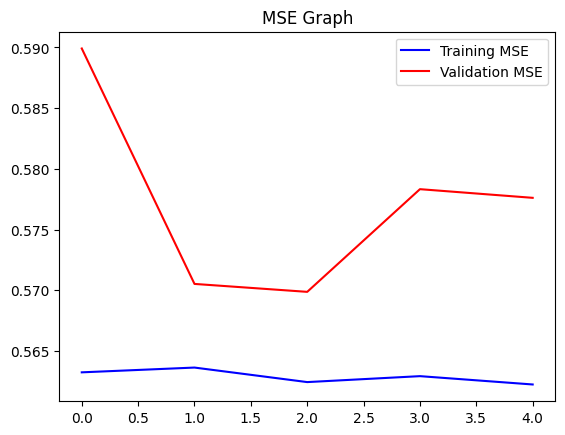

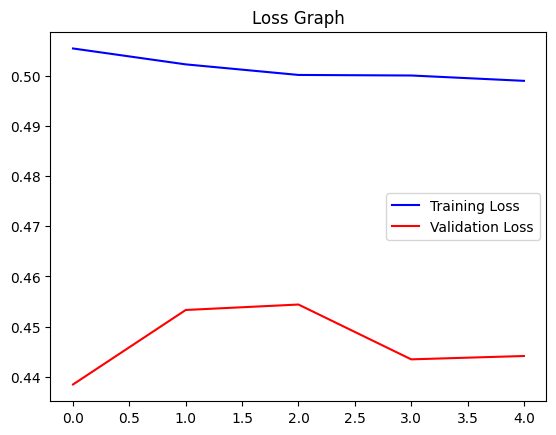

In [17]:
acc = history.history['mae']
val_acc = history.history['val_mae']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training MSE')
plt.plot(epochs, val_acc, 'r', label='Validation MSE')
plt.title('MSE Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

In [18]:
ypred2 = model2.predict(test)

1052/1052 [==============================] - 97s 92ms/step


In [51]:
predictions = []
real_data = []
for i in range(4):
    index = random.randint(0, 1000)
    real_data.append(dfTest.iloc[index][6])
    predictions.append(ypred2[index])
print(real_data)
print(predictions)

[3.53, 3.51, 3.39, 3.53]
[array([2.720898], dtype=float32), array([2.720898], dtype=float32), array([2.720898], dtype=float32), array([2.720898], dtype=float32)]


In [20]:
dfTrain = pd.read_csv('./Train_copia2.csv')
dfValidation = pd.read_csv('./Validation2.csv')
dfTest = pd.read_csv('./Test2.csv')

In [21]:
model3 = Sequential([
            Conv2D(32, (3,3), activation='linear'),
            MaxPooling2D((2,2)),
            Conv2D(64, (3,3), activation='linear'),
            MaxPooling2D((2,2)),
            Conv2D(128, (3,3), activation='linear'),
            MaxPooling2D((2,2)),
            Flatten(),
            Dense(64, activation='linear'),
            Dense(32, activation='linear'),
            Dense(1, activation='linear')
]) 

In [22]:
model3.compile(optimizer='adam', metrics=['mae'], loss="mean_squared_error",)

In [23]:
def to_grayscale_then_rgb(image):
    image = tf.image.rgb_to_grayscale(image)
    image = tf.image.grayscale_to_rgb(image)
    return image

generator = ImageDataGenerator(
    rescale= 1. / 255,
    preprocessing_function=to_grayscale_then_rgb
)

train = generator.flow_from_dataframe(
    dataframe=dfTrain,
    x_col=' Filename',
    y_col=' Discharge',
    target_size=(280, 230),
    batch_size=16, 
    class_mode='raw',
    validate_filenames=True
)

test = generator.flow_from_dataframe(
    dataframe=dfTest,
    x_col=' Filename', 
    y_col=' Discharge',
    target_size=(280, 230),
    batch_size=16,
    class_mode='raw',
    validate_filenames=True
)

validation = generator.flow_from_dataframe(
    dataframe=dfValidation,
    x_col=' Filename',
    y_col=' Discharge',
    target_size=(280, 230), 
    batch_size=16, 
    class_mode='raw',
    validate_filenames=True
)

Found 14998 validated image filenames.


C:\Users\david\miniconda3\envs\tf_2.4\lib\site-packages\keras\preprocessing\image.py:1139: UserWarning: Found 1 invalid image filename(s) in x_col=" Filename". These filename(s) will be ignored.
  warnings.warn(


Found 8414 validated image filenames.
Found 8411 validated image filenames.


In [24]:
history = model3.fit(train, epochs=5, validation_data=validation)

Epoch 1/5
938/938 [==============================] - 265s 281ms/step - loss: 0.5144 - mae: 0.5691 - val_loss: 0.4425 - val_mae: 0.5795
Epoch 2/5
938/938 [==============================] - 128s 136ms/step - loss: 0.5005 - mae: 0.5633 - val_loss: 0.4566 - val_mae: 0.5686
Epoch 3/5
938/938 [==============================] - 128s 136ms/step - loss: 0.5000 - mae: 0.5630 - val_loss: 0.4559 - val_mae: 0.5690
Epoch 4/5
938/938 [==============================] - 128s 136ms/step - loss: 0.4997 - mae: 0.5629 - val_loss: 0.4443 - val_mae: 0.5775
Epoch 5/5
938/938 [==============================] - 131s 139ms/step - loss: 0.4989 - mae: 0.5623 - val_loss: 0.4780 - val_mae: 0.5595


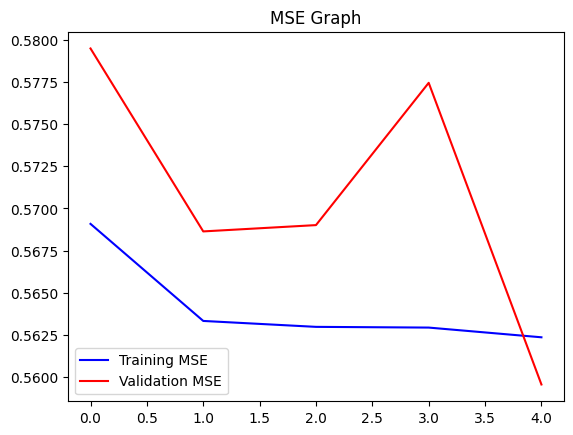

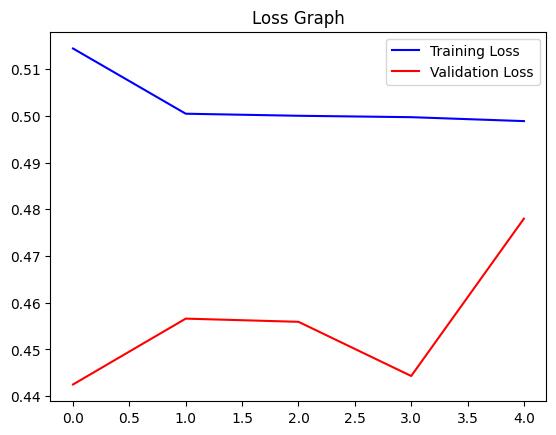

In [25]:
acc = history.history['mae']
val_acc = history.history['val_mae']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training MSE')
plt.plot(epochs, val_acc, 'r', label='Validation MSE')
plt.title('MSE Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

In [26]:
dfTest.iloc[3][2]

'./new/StateLineWeir_20170701_Farrell_342.jpg'

In [27]:
ypred3 = model3.predict(test)

526/526 [==============================] - 82s 156ms/step


In [38]:
predictions = []
real_data = []
for i in range(4):
    index = random.randint(0, 1000)
    real_data.append(dfTest.iloc[index][6])
    predictions.append(ypred3[index])
print(real_data)
print(predictions)

[3.6, 3.34, 3.45, 3.52]
[array([2.5973885], dtype=float32), array([2.5973885], dtype=float32), array([2.5973885], dtype=float32), array([2.5973885], dtype=float32)]


In [19]:
#predictions = []
#real_data = []

#for i in range(4):
#    index = random.randint(0, 1000)
#    new_image = tf.expand_dims(dfTest.iloc[index][2],0)
#    ypred = model.predict(new_image)
#    real_data.append(dfTest.iloc[index][6])
#    predictions.append(ypred)
#print(real_data)
#print(predictions)

ValueError: in user code:

    File "C:\Users\david\miniconda3\envs\tf_2.4\lib\site-packages\keras\engine\training.py", line 2041, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\david\miniconda3\envs\tf_2.4\lib\site-packages\keras\engine\training.py", line 2027, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\david\miniconda3\envs\tf_2.4\lib\site-packages\keras\engine\training.py", line 2015, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\david\miniconda3\envs\tf_2.4\lib\site-packages\keras\engine\training.py", line 1983, in predict_step
        return self(x, training=False)
    File "C:\Users\david\miniconda3\envs\tf_2.4\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\david\miniconda3\envs\tf_2.4\lib\site-packages\keras\engine\input_spec.py", line 250, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_1" "                 f"(type Sequential).
    
    Input 0 of layer "conv2d_3" is incompatible with the layer: expected min_ndim=4, found ndim=1. Full shape received: (None,)
    
    Call arguments received by layer "sequential_1" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(None,), dtype=string)
      • training=False
      • mask=None
